In [108]:
# Simulation-Uhrzeit: Simulationszeit als Uhrzeit [hh:mm:ss] = simulation time
# Simulationssekunde: Simulationzeit
#Fahrzeugprotokol = Vehicle record
#Eindeutige Fahrzeugnummer = Vehicle number
#Entfernung auf der Strecke vom Beginn der Strecke oder Verbindungsstrecke = Position
#Querposition am Ende des Zeitschritts. Wertebereich 0-1:   = Position LAT
# 0: an der rechten Fahrstreifenkante
# 0.5: Mitte des Fahrstreifens
# 1: an der linken Fahrstreifenkante

# Beschleinigung = acceleration
# Geschwindigkeit = Speed

# Zeit im Netz : Die gesamte Zeit, die ein Fahrzeug im Netz ist:
# Der Wert wird erst in der letzten Sekunde, bevor das Fahrzeug das Netz verlässt, gespeichert.
# Protokollieren Sie in diesem Zeitschritt auch die Verlustzeit für das Fahrzeug.
# Für Fahrzeuge, die sich am Ende der Simulation noch im Netz befinden, können Sie die Gesamtzeit anhand ihrer Einsetzzeit ermitteln.

# https://datatofish.com/descriptive-statistics-pandas/
# https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

# variance:
# https://blog.finxter.com/how-to-calculate-the-column-variance-of-a-dataframe-in-python-pandas/
# axis = 0 is Row, axis = 1 is Column
#simulation second is from 0 to 7200.0
# steps are 0.5, 0.6, 0.7

# Vehicle type is 100, 150, 200, 300
# 100 = car, 150 = transporter, 200 = HGV, 300 = bus

In [109]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [110]:
# this method manages the drawing part
def set_up_sketch_x_position() -> "tuple of (ax1,ax2,ax3)":

    xticks = np.arange(0, 320, 10)
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, ncols=1)
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
    ax1.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
    ax1.spines["bottom"].set_color("black")
    ax1.spines["left"].set_color("black")
    ax1.set_xticks(xticks)
    ax1.set_xlabel("Position(m)", color="black")
    ax1.set_ylabel("Speed(km/hr)", color="black")
    ax1.grid("on", alpha=0.2)

    ax2.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
    ax2.spines["bottom"].set_color("black")
    ax2.spines["left"].set_color("black")
    ax2.set_xticks(xticks)
    ax2.set_xlabel("Position(m)", color="black")
    ax2.set_xticks(xticks)
    ax2.set_xlabel("Position(m)", color="black")
    ax2.set_ylabel("Simulation time(second)", color="black")
    ax2.grid("on", alpha=0.2)

    ax3.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
    ax3.spines["bottom"].set_color("black")
    ax3.spines["left"].set_color("black")
    ax3.set_xticks(xticks)
    ax3.set_xlabel("position", color="black")
    ax3.set_ylabel("Acceleration(m/s2)", color="black")
    ax3.grid("on", alpha=0.2)
    return (ax1,ax2,ax3)

In [111]:
# this method manages the drawing part
def set_up_sketch_x_time() -> "tuple of (ax1,ax2,ax3)":

    # xticks = np.arange(0, 320, 10)
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, ncols=1)
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
    ax1.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
    ax1.spines["bottom"].set_color("black")
    ax1.spines["left"].set_color("black")
    ax1.set_xlabel("Time(seconds)", color="black")
    ax1.set_ylabel("Position(m)", color="black")
    ax1.grid("on", alpha=0.2)

    ax2.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
    ax2.spines["bottom"].set_color("black")
    ax2.spines["left"].set_color("black")
    ax2.set_xlabel("Time(seconds)", color="black")
    # ax2.set_xticks(xticks)
    ax2.set_ylabel("Speed(km/hr)", color="black")
    ax2.grid("on", alpha=0.2)

    ax3.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
    ax3.spines["bottom"].set_color("black")
    ax3.spines["left"].set_color("black")
    ax3.set_xlabel("Time(seconds)", color="black")
    ax3.set_ylabel("Acceleration(m/s2)", color="black")
    ax3.grid("on", alpha=0.2)
    return (ax1,ax2,ax3)


In [112]:
# base scenario

#change the vehicle type from number to name
vehicle_routes_based = pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - baseline.csv")
#change the vehicle type from number to name
vehicle_routes_based['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                        inplace=True)
len(vehicle_routes_based)
# show the unique cars
number_of_cars_based_scenario = vehicle_routes_based["$VEHICLE:NO"].unique()
# total number of cars in the network in the based scenario
len(number_of_cars_based_scenario)



4090

In [113]:
# scenario1
vehicle_routes_scenario1 = pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 1.csv")
#change the vehicle type from number to name
vehicle_routes_scenario1['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                            inplace=True)
len(vehicle_routes_scenario1)
# show the unique cars
number_of_cars_scenario1 = vehicle_routes_scenario1["$VEHICLE:NO"].unique()
# total number of cars in the network in the scenario1
len(number_of_cars_scenario1)

4090

In [114]:
# scenario2
vehicle_routes_scenario2 = pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 2.csv")
#change the vehicle type from number to name
vehicle_routes_scenario2['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                            inplace=True)
len(vehicle_routes_scenario2)
# show the unique cars
number_of_cars_scenario2 = vehicle_routes_scenario2["$VEHICLE:NO"].unique()
# total number of cars in the network in the scenario2
len(number_of_cars_scenario2)


4090

In [115]:
# show trajectories of the based model
vehicle_routes_based.head()


,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


In [116]:
# show trajectories of the scenario 1
vehicle_routes_scenario1.head()


,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


In [117]:
# show trajectories of the scenario 2
vehicle_routes_scenario2.head()


,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


In [118]:
# for the car number 101 in the based scenario, plot the acceleration in each time step
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
# car_101_based = vehicle_routes_based[vehicle_routes_based["$VEHICLE:NO"] == 101]
# car_101_scenario1 = vehicle_routes_scenario1[vehicle_routes_scenario1["$VEHICLE:NO"] == 101]
# fig, ax = plt.subplots(figsize=(10, 10))
# plt.xticks(fontsize=10, color="red")
# plt.yticks(fontsize=10, color="red")
# ax.set_xlabel("SIMSEC", fontsize=10, color="red", rotation="45")
# line1, = ax.plot(car_101_based["SIMSEC"], car_101_based["SPEED"])
# line1.set_color("red")
# line2, = ax.plot(car_101_scenario1["SIMSEC"], car_101_scenario1["SPEED"])
# line2.set_linestyle("--")
# ax.xaxis.grid(True, color="black", linewidth=0.2)


Based Scenario: Car Follow-up Position on X axis



1904
1913
1917
1924
1916


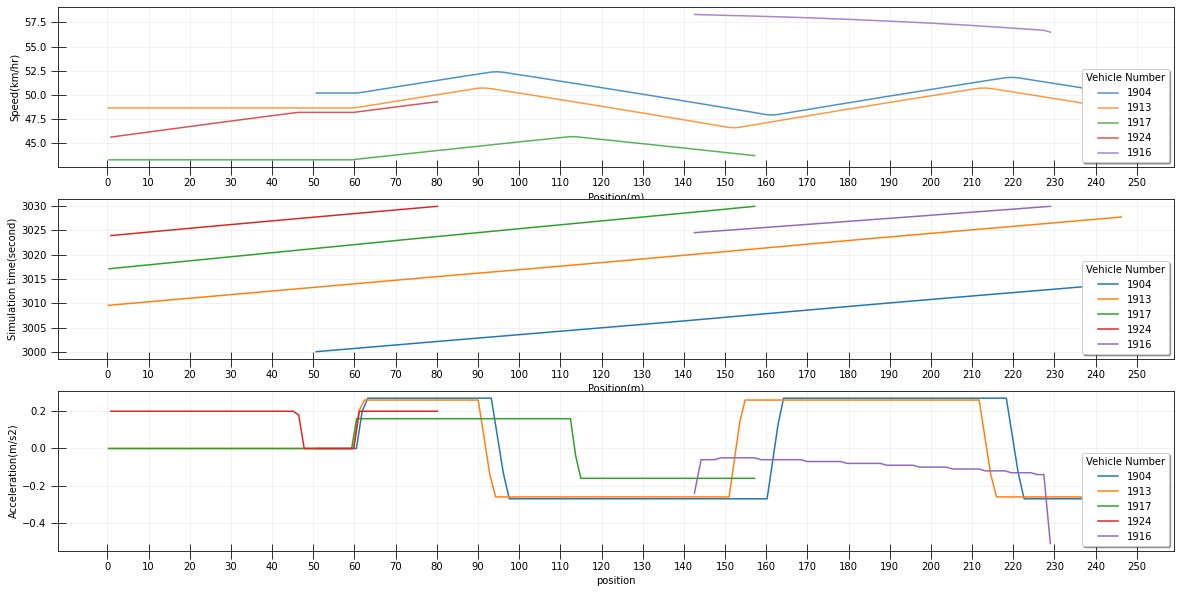

In [119]:
all_cars_on_link_24_based = vehicle_routes_based[
    (vehicle_routes_based["LANE\\LINK\\NO"] == 24) & (vehicle_routes_based["SIMSEC"] < 3300) & (
            vehicle_routes_based["SIMSEC"] > 3000)]
all_cars_on_link_24_tenseconds_based = all_cars_on_link_24_based[(all_cars_on_link_24_based["SIMSEC"] < 3030) & (all_cars_on_link_24_based["SIMSEC"] > 3000) & (all_cars_on_link_24_based["LANE\INDEX"] == 1)]
cars_tenseconds_based = all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"].unique()
# based scenario
ax1,ax2,ax3  = set_up_sketch_x_position()
# sketch the information with x axis with position
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_based[all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["POS"], specific_car["SPEED"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["POS"], specific_car["SIMSEC"], label=car_number)
    ax3.plot(specific_car["POS"], specific_car["ACCELERATION"], label=car_number)
#set upd legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax3.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
plt.savefig("data/Visualization of trajectories/HeinrichStreet N-SE baseline pos on x bla.png")

Based Scenario: Car Follow-up Time on X axis

1904
1913
1917
1924
1916


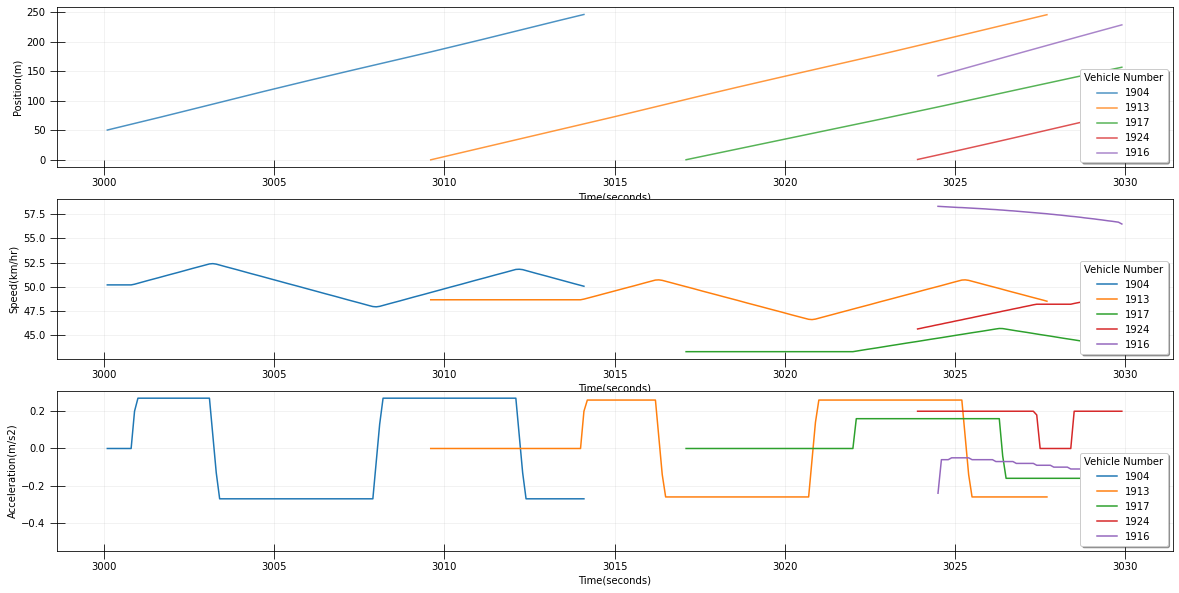

In [120]:
# based scenario
ax1,ax2,ax3  = set_up_sketch_x_time()
# sketch the information with x axis with time
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_based[all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["SIMSEC"], specific_car["POS"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["SIMSEC"], specific_car["SPEED"], label=car_number)
    ax3.plot(specific_car["SIMSEC"], specific_car["ACCELERATION"], label=car_number)
#set-up legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax3.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
plt.savefig("data/Visualization of trajectories/HeinrichStreet N-SE baseline time on x bla.png")


Scenario 1: Car Follow-up Position on X axis


1904
1913
1917
1924
1916


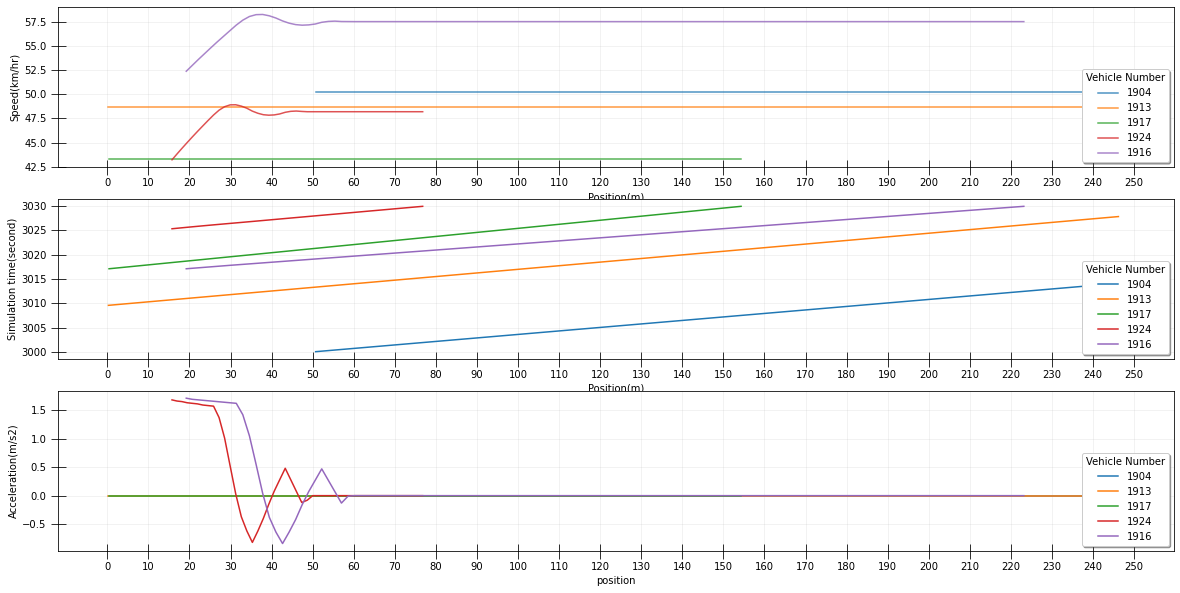

In [121]:
all_cars_on_link_24_scenario1 = vehicle_routes_scenario1[
    (vehicle_routes_scenario1["LANE\\LINK\\NO"] == 24) & (vehicle_routes_scenario1["SIMSEC"] < 3300) & (
            vehicle_routes_scenario1["SIMSEC"] > 3000)]
all_cars_on_link_24_tenseconds_scenario1 = all_cars_on_link_24_scenario1[(all_cars_on_link_24_scenario1["SIMSEC"] < 3030) & (all_cars_on_link_24_scenario1["SIMSEC"] > 3000) & (all_cars_on_link_24_scenario1["LANE\INDEX"] == 1)]
cars_tenseconds_scenario1 = all_cars_on_link_24_tenseconds_scenario1["$VEHICLE:NO"].unique()
# scenario 1
ax1,ax2,ax3  = set_up_sketch_x_position()
# sketch the information with x axis with position
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_scenario1[all_cars_on_link_24_tenseconds_scenario1["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["POS"], specific_car["SPEED"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["POS"], specific_car["SIMSEC"], label=car_number)
    ax3.plot(specific_car["POS"], specific_car["ACCELERATION"], label=car_number)
#set upd legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax3.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
# plt.savefig("data/Visualization of trajectories/HeinrichStreet N-SE scenario1 position on x.png")


Scenario 1: Car Follow-up Time on X axis


1904
1913
1917
1924
1916


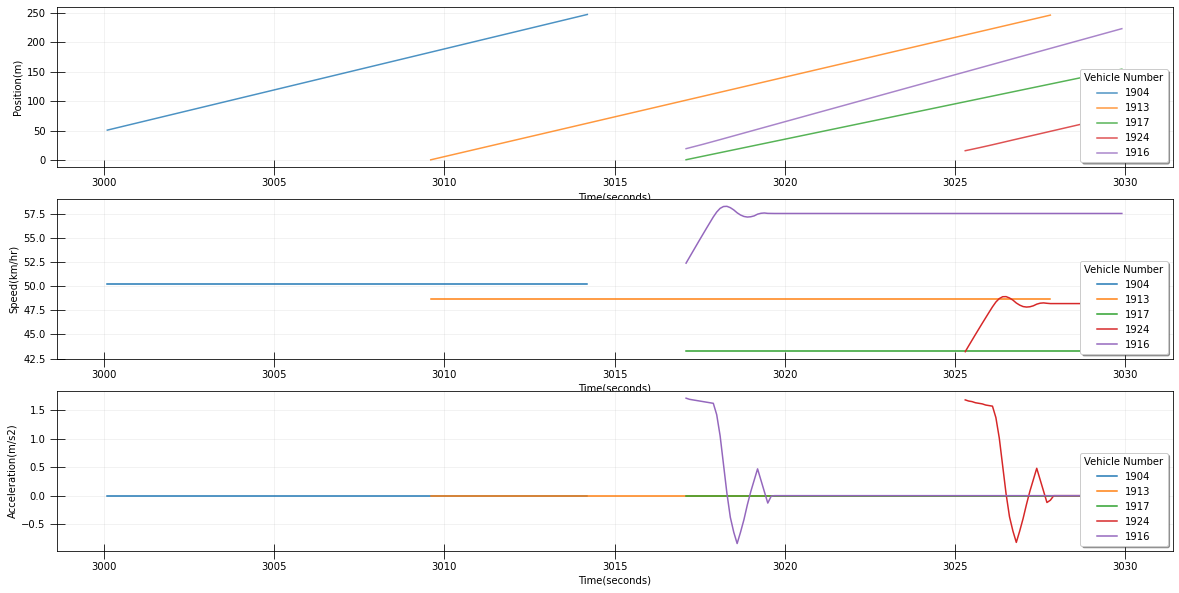

In [122]:
# based scenario
ax1,ax2,ax3  = set_up_sketch_x_time()
# sketch the information with x axis with time
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_scenario1[all_cars_on_link_24_tenseconds_scenario1["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["SIMSEC"], specific_car["POS"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["SIMSEC"], specific_car["SPEED"], label=car_number)
    ax3.plot(specific_car["SIMSEC"], specific_car["ACCELERATION"], label=car_number)
#set-up legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax3.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
# plt.savefig("data/Visualization of trajectories/HeinrichStreet N-SE scenario1 time on x.png")


Scenario 2: Car Follow-up Position on X axis



1897
1904
1906
1913
1916
1917
1922
1924


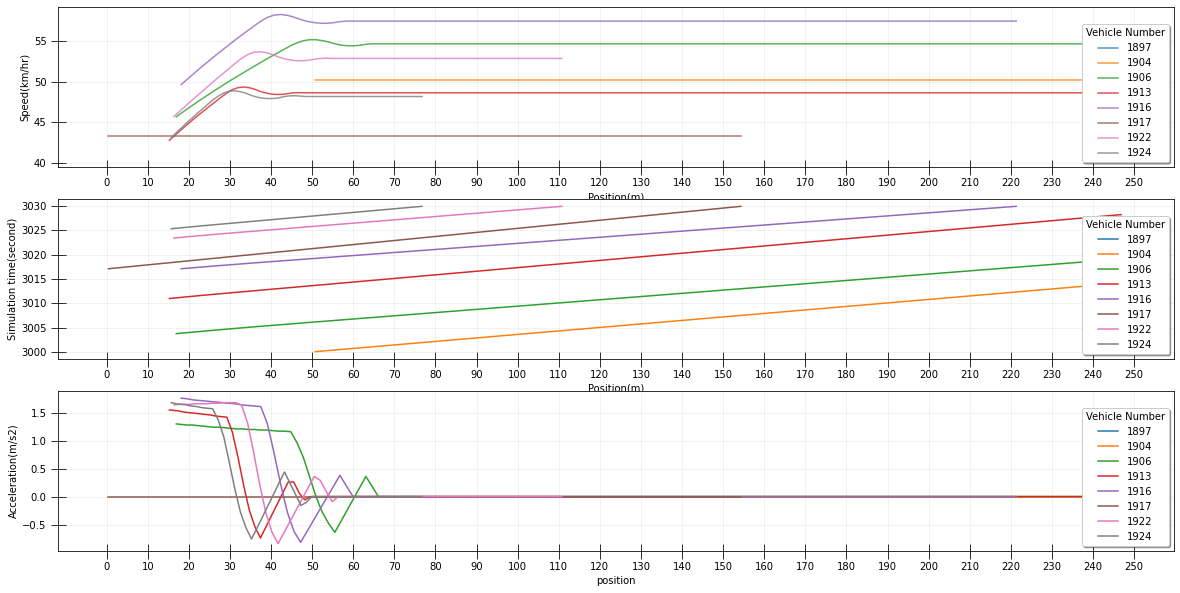

In [123]:
all_cars_on_link_24_scenario2 = vehicle_routes_scenario2[
    (vehicle_routes_scenario2["LANE\\LINK\\NO"] == 24) & (vehicle_routes_scenario2["SIMSEC"] < 3300) & (
            vehicle_routes_scenario2["SIMSEC"] > 3000)]
all_cars_on_link_24_tenseconds_scenario2 = all_cars_on_link_24_scenario2[(all_cars_on_link_24_scenario2["SIMSEC"] < 3030) & (all_cars_on_link_24_scenario2["SIMSEC"] > 3000) & (all_cars_on_link_24_scenario2["LANE\INDEX"] == 1)]
cars_tenseconds_scenario2 = all_cars_on_link_24_tenseconds_scenario2["$VEHICLE:NO"].unique()
# scenario 2
ax1,ax2,ax3  = set_up_sketch_x_position()
# sketch the information with x axis with position
for car_number in cars_tenseconds_scenario2:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_scenario2[all_cars_on_link_24_tenseconds_scenario2["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["POS"], specific_car["SPEED"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["POS"], specific_car["SIMSEC"], label=car_number)
    ax3.plot(specific_car["POS"], specific_car["ACCELERATION"], label=car_number)
#set upd legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax3.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
# plt.savefig("data/Visualization of trajectories/HeinrichStreet N-SE scenario2 position on x.png")


Scenario 2: Car Follow-up Time on X axis

1904
1913
1917
1924
1916


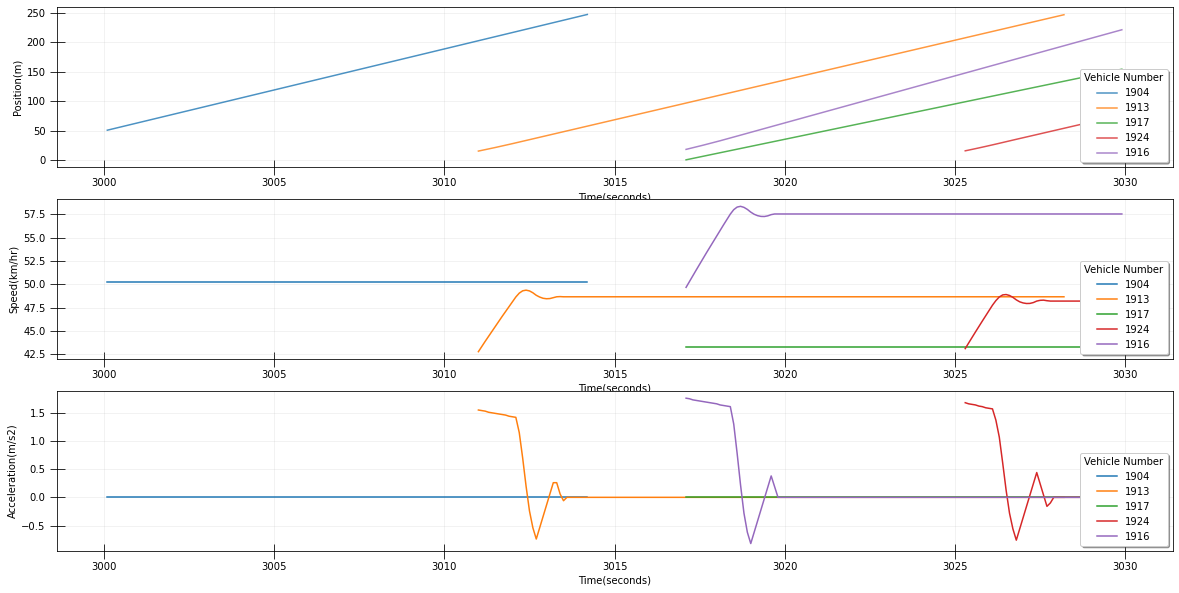

In [124]:
# based scenario
ax1,ax2,ax3  = set_up_sketch_x_time()
# sketch the information with x axis with time
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_scenario2[all_cars_on_link_24_tenseconds_scenario2["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["SIMSEC"], specific_car["POS"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["SIMSEC"], specific_car["SPEED"], label=car_number)
    ax3.plot(specific_car["SIMSEC"], specific_car["ACCELERATION"], label=car_number)
#set-up legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
ax3.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
# plt.savefig("data/Visualization of trajectories/HeinrichStreet N-SE scenario2 time on x.png")


In [125]:
# For each car, we calculate the mean speed at each time step. So every car has one arithmetic mean speed in the simulation.
# The mean speed of the simulation consists of the mean speed of each vehicle.
# based scenario
mean_speed_of_veh_based = vehicle_routes_based.groupby(["$VEHICLE:NO"]).mean()[["SPEED"]]
mean_speed_of_veh_based.mean()

SPEED    47.694309
dtype: float64

In [126]:
# For each car, we calculate the mean speed at each time step. So every car has one arithmetic mean speed in the simulation.
# The mean speed of the simulation consists of the mean speed of each vehicle.
# scenario 1
mean_speed_of_veh_scenario1 = vehicle_routes_scenario1.groupby(["$VEHICLE:NO"]).mean()[["SPEED"]]
mean_speed_of_veh_scenario1.mean()

SPEED    48.239769
dtype: float64

In [127]:
# For each car, we calculate the mean speed at each time step. So every car has one arithmetic mean speed in the simulation.
# The mean speed of the simulation consists of the mean speed of each vehicle.
# scenario 2
mean_speed_of_veh_scenario2 = vehicle_routes_scenario2.groupby(["$VEHICLE:NO"]).mean()[["SPEED"]]
mean_speed_of_veh_scenario2.mean()



SPEED    47.5539
dtype: float64